## **EXTRACCIÓN**

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/telecomx2.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [7]:
# Ver las columnas disponibles
df.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod', 'Total.Day',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [8]:
#verificar la estructura general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

## **Preparación**


En la fase de depuración de columnas, la meta es descartar aquellas variables que:
- Carecen de utilidad predictiva (por ejemplo, identificadores únicos).
- Replican información ya contenida en otras columnas.
- Podrían generar fuga de información (data leakage).


In [9]:
df = df.drop(columns=['customerID'])

Resumen breve — Agrupar "No" y "No internet service"

Se unifican ambas categorías para reducir la multicolinealidad y simplificar el dataset.
- Antes: tres valores → Yes, No, No internet service.
- Problema: al convertirlos en dummies, se generaba correlación perfecta y VIF infinito, afectando la estabilidad del modelo.
- Ahora: dos valores → Yes = usa el servicio / No = no lo usa (por cualquier motivo).
- La info sobre si el cliente tiene internet permanece en InternetService.
Impacto: se pierde un matiz, pero se gana robustez, menos ruido y menor redundancia


In [37]:
df_clean = df.copy()

cols_to_fix = [
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

categorical_cols = [
   'Churn', 'customer.gender', 'customer.Partner', 'customer.Dependents',
   'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
   'internet.OnlineSecurity', 'internet.OnlineBackup',
   'internet.DeviceProtection', 'internet.TechSupport',
   'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
   'account.PaperlessBilling', 'account.PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

df_encoded

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total,Churn_Yes,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,...,internet.DeviceProtection_Yes,internet.TechSupport_Yes,internet.StreamingTV_Yes,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,2.20,65.60,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.90,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.90,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.00,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.90,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,1.90,55.15,742.90,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,2.84,85.10,1873.70,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,1.55,50.30,92.75,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,2.30,67.85,4627.65,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   Total.Day                                      7032 non-null   float64
 3   account.Charges.Monthly                        7043 non-null   float64
 4   account.Charges.Total                          7032 non-null   float64
 5   Churn_Yes                                      7043 non-null   bool   
 6   customer.gender_Male                           7043 non-null   bool   
 7   customer.Partner_Yes                           7043 non-null   bool   
 8   customer.Dependents_Yes                        7043 non-null   bool   
 9   phone.PhoneService_Yes                         7043 

✔️ Verificación nuevamente de los valores nulos


In [12]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,11
account.Charges.Monthly,0
account.Charges.Total,11
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


In [13]:
# Verifica valores nulos en las dos columnas
print(df_encoded[['Total.Day', 'account.Charges.Total']].isnull().sum())

Total.Day                11
account.Charges.Total    11
dtype: int64


In [14]:
# Elimina filas con valores nulos en las columnas especificadas
df_encoded = df_encoded.dropna(subset=['Total.Day', 'account.Charges.Total'])

**Tratamiento de valores nulos**

En las columnas Total.Day y account.Charges.Total se detectaron valores nulos. Frente a este escenario, las alternativas eran:
- Eliminar filas: dado que los registros afectados son pocos (11 de más de 7 000), su eliminación no compromete el análisis y evita introducir sesgos o distorsiones.
- Imputar con cero: viable si el nulo indica ausencia de servicio o cobro, aunque puede alterar promedios y totales si no refleja la realidad.
Decisión: optar por eliminar las filas con valores nulos, priorizando la integridad de los datos y manteniendo el dataset libre de inconsistencias.


In [15]:
df_encoded.isnull().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
Total.Day,0
account.Charges.Monthly,0
account.Charges.Total,0
Churn_Yes,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0


**Normalización de datos**

Se aplica Min-Max Scaling para llevar todas las variables numéricas al rango [0, 1], garantizando que aporten de forma equilibrada en modelos sensibles a la escala (KNN, Redes Neuronales, Regresión Logística, SVM).
Modelos basados en árboles no lo requieren.



## ≡ Correlación entre las variables


In [16]:
corr = df_encoded.corr()

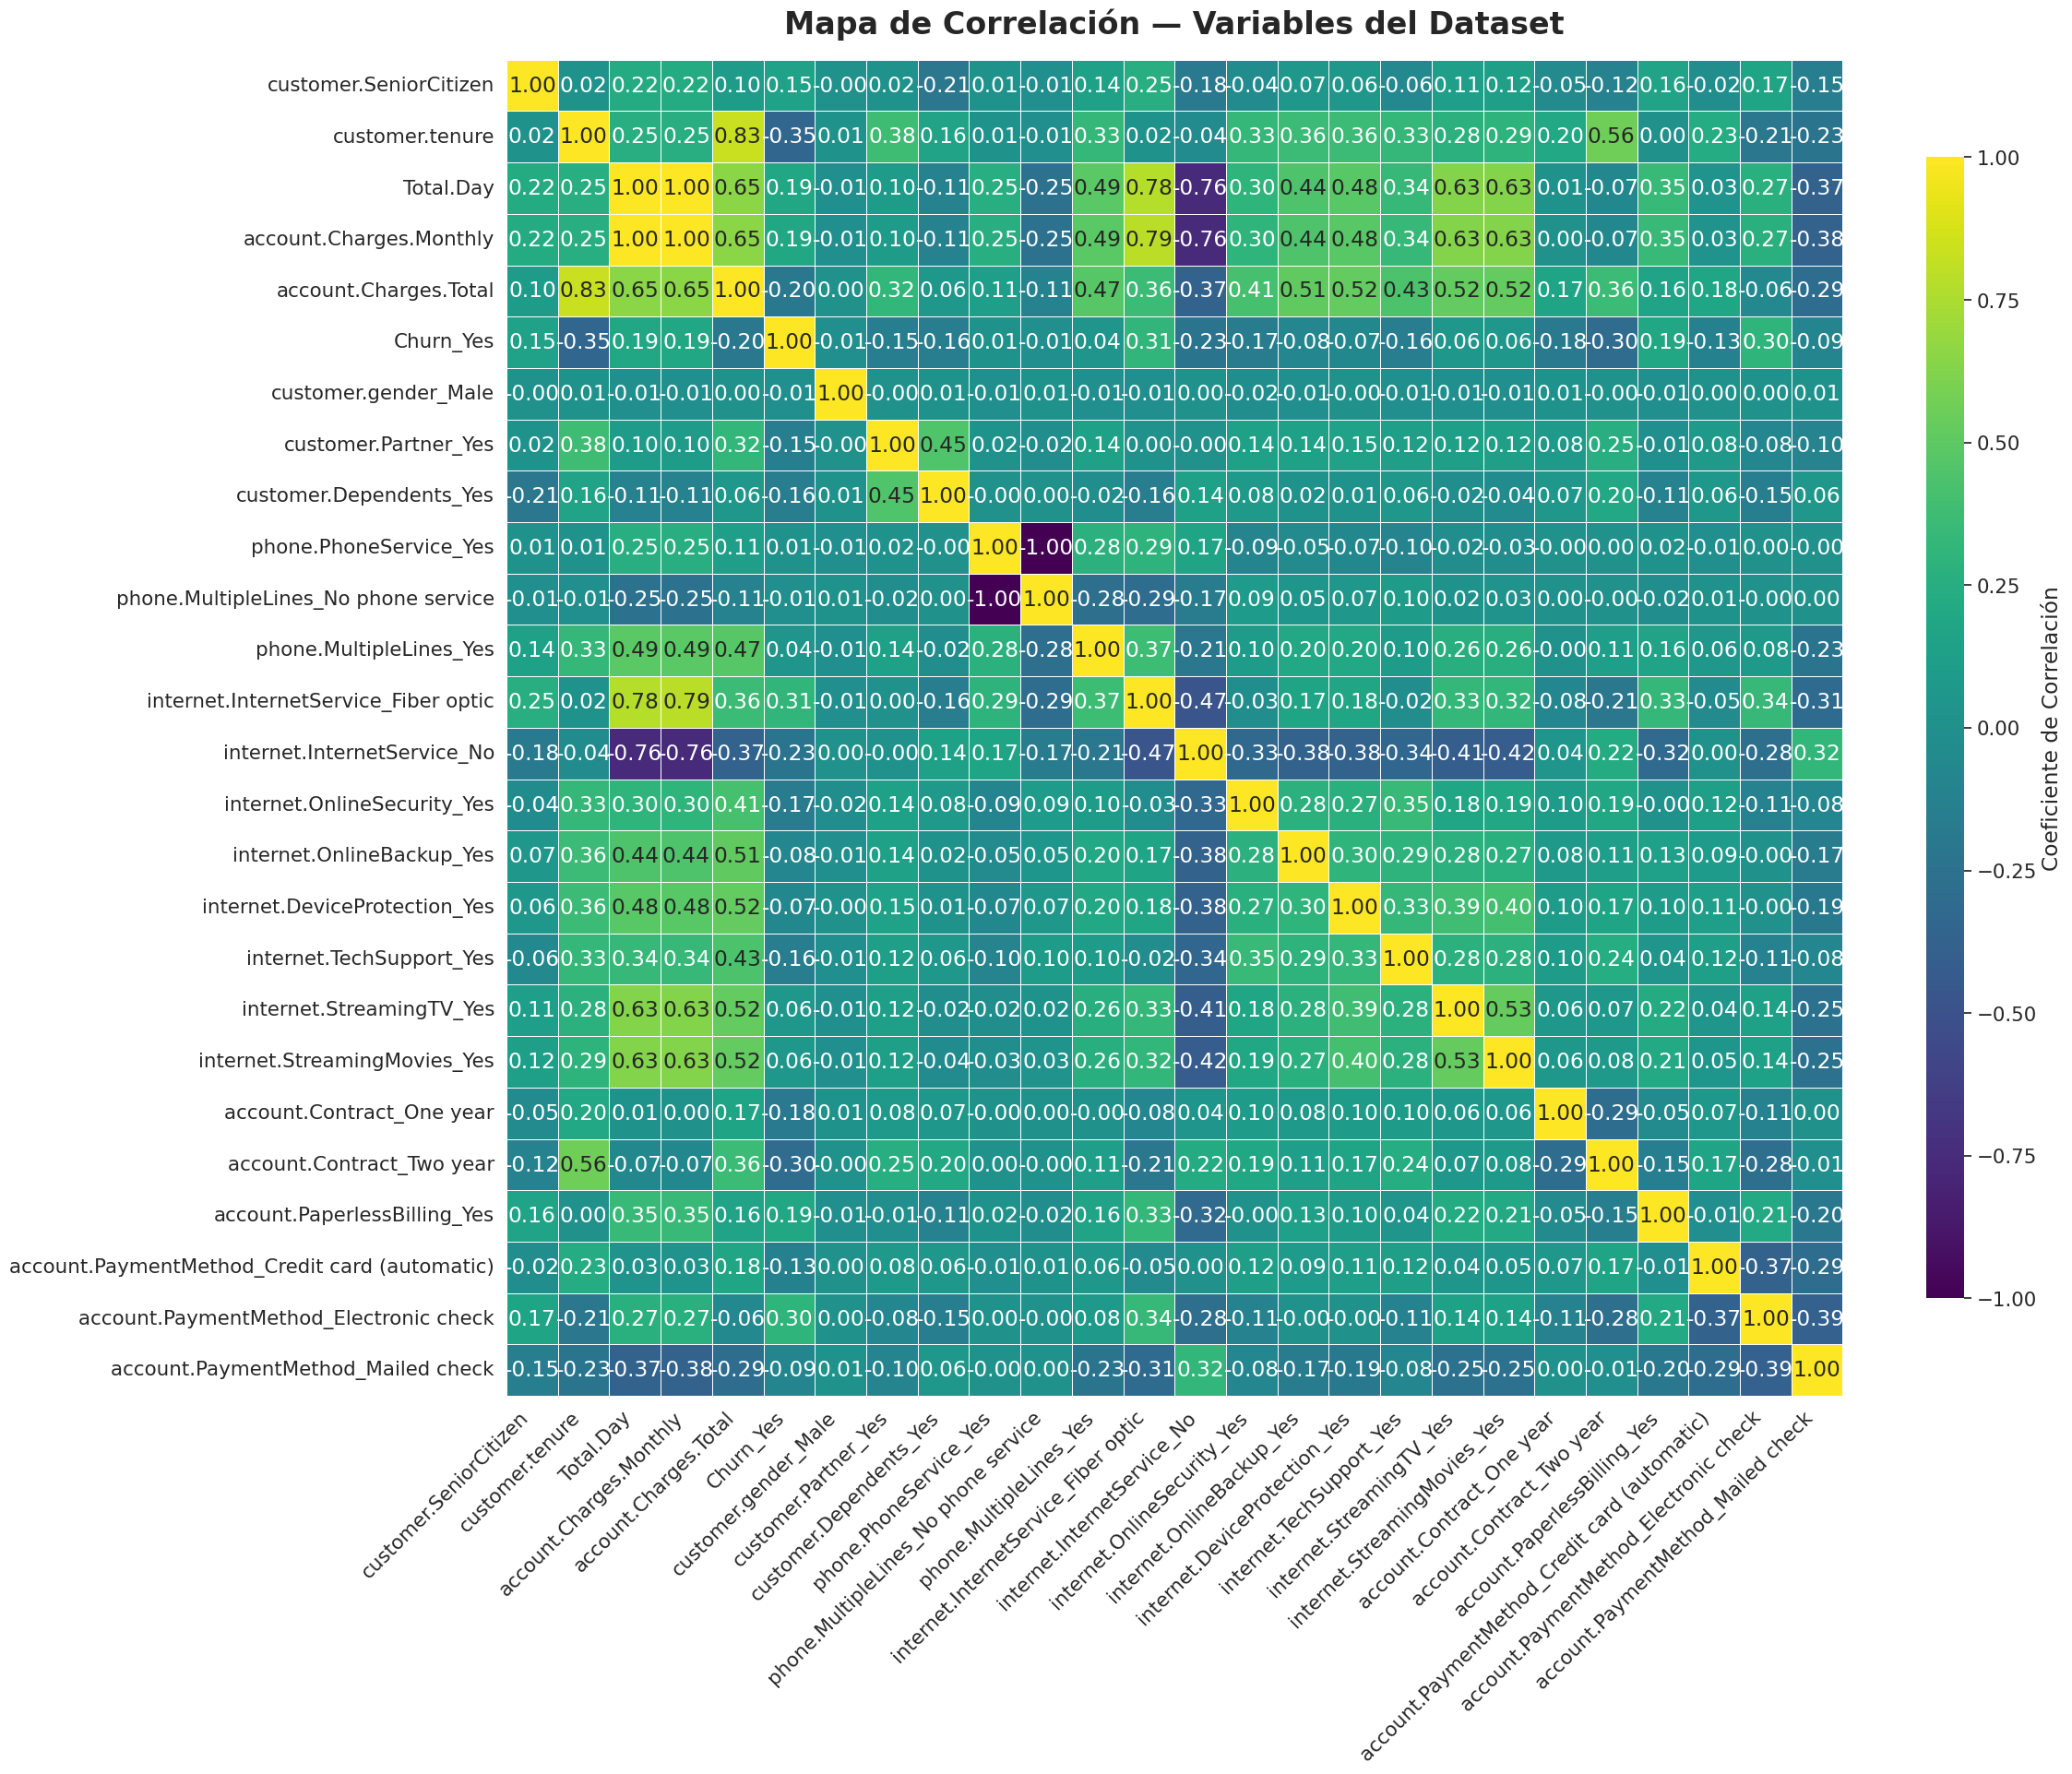

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo y tamaño de fuente
sns.set_theme(style="whitegrid", font_scale=1.4)

# Ajustar tamaño de la figura
fig, ax = plt.subplots(figsize=(24, 20))

# Heatmap mejorado
sns.heatmap(
    np.round(corr, 2),
    annot=True,
    fmt=".2f",
    cmap="viridis",
    vmin=-1, vmax=1, center=0,
    square=True,
    linewidths=0.5,
    linecolor='white',
    cbar_kws={"shrink": 0.8, "aspect": 30, "label": "Coeficiente de Correlación"}
)

# Ajustar rotación y alineación de las etiquetas
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Título
ax.set_title("Mapa de Correlación — Variables del Dataset", fontsize=24, pad=20, weight='bold')

plt.tight_layout()
plt.show()

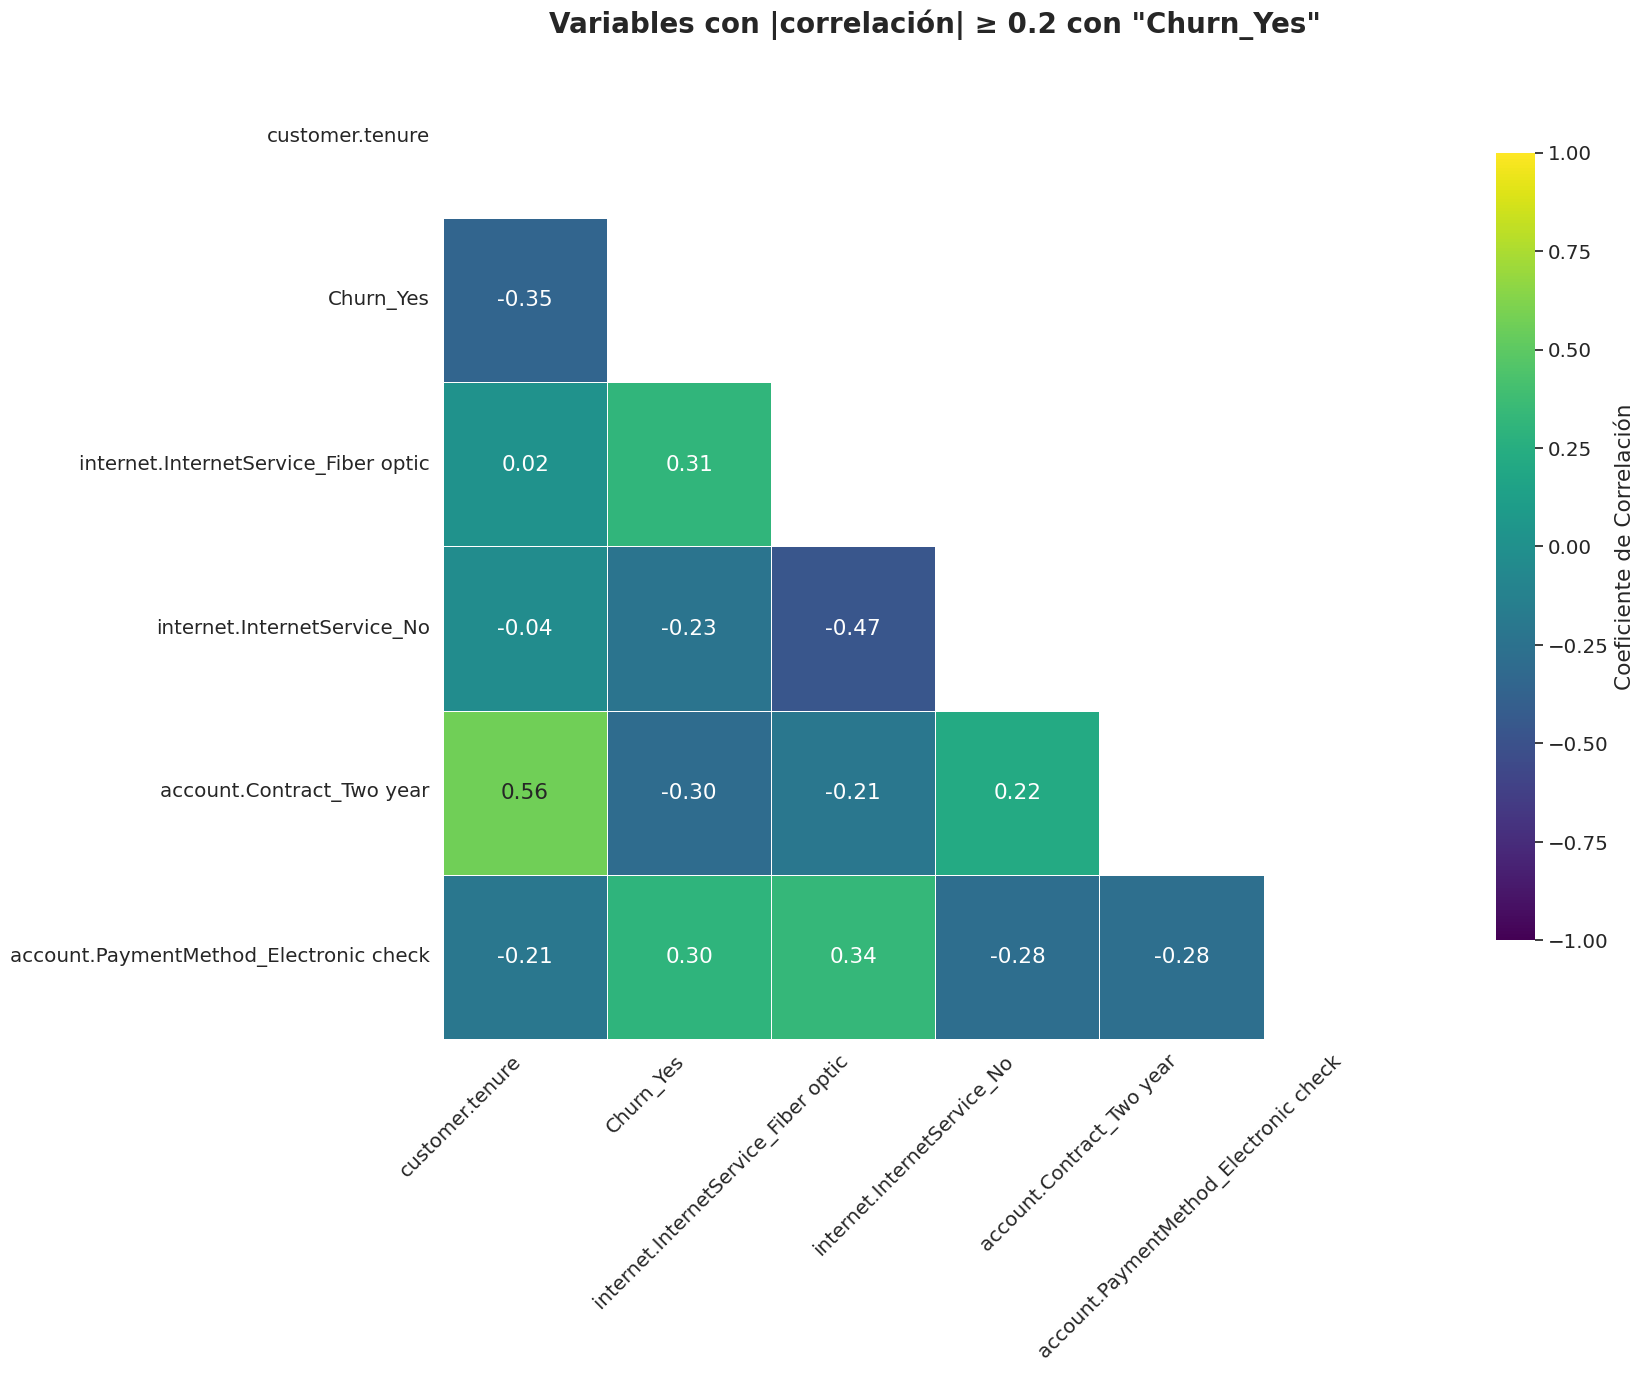

In [44]:
# Parámetros
target_var = 'Churn_Yes'
umbral = 0.2

# Filtrar variables relevantes
vars_relev = corr.columns[abs(corr[target_var]) >= umbral].tolist()
if target_var not in vars_relev:
    vars_relev.append(target_var)

# Matriz filtrada y máscara
corr_filt = corr.loc[vars_relev, vars_relev]
mask = np.triu(np.ones_like(corr_filt, dtype=bool))

# Estilo y figura
sns.set_theme(style="white", font_scale=1.3)
plt.figure(figsize=(18, 14))

sns.heatmap(
    corr_filt, mask=mask, annot=True, fmt=".2f",
    cmap="viridis", vmin=-1, vmax=1, center=0,
    square=True, linewidths=0.5, linecolor='white',
    cbar_kws={"shrink": 0.8, "label": "Coeficiente de Correlación"}
)

plt.title(f'Variables con |correlación| ≥ {umbral} con "{target_var}"', fontsize=20, pad=15, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Resumen — Umbral y máscara en heatmap de correlación
- Umbral: filtra solo las variables con correlación absoluta ≥ X con la variable objetivo ("Evasión" en este caso).
➜ Reduce ruido, elimina relaciones poco significativas y enfoca el gráfico en lo relevante.
- Máscara (triángulo inferior): oculta la parte redundante de la matriz, ya que es simétrica.
➜ Muestra cada par de variables una sola vez y mejora la legibilidad.
Ventaja combinada: menos variables, gráfico limpio y comparaciones más fáciles, resaltando solo las correlaciones que realmente importan.


📈 Análisis del heatmap — Correlaciones relevantes con Churn_Yes (≥ 0.2)
- Fibra óptica (+0.31): mayor probabilidad de churn, posiblemente por costo o competencia.
- Pago por cheque electrónico (+0.30): asociado a clientes menos fidelizados.
- Contrato 2 años (−0.30): reduce churn; mayor compromiso y beneficios.
- Antigüedad del cliente (−0.35): a más tiempo, menor churn.
- Sin servicio de internet (−0.23): menor churn; perfil más estable y menos digital


## 🔍 Análisis de Multicolinealidad


2. **Usar análisis del Factor de Inflación de la Varianza (VIF):**

* El VIF ayuda a detectar la presencia de multicolinealidad entre variables independientes.
* Generalmente, **VIF > 5** o **VIF > 10** indica que la variable está colineal con otras y puede ser eliminada.


📏 Uso del VIF (Variance Inflation Factor)
- Calcularlo → Cuando uses modelos lineales y quieras interpretar coeficientes con precisión y mantener la estabilidad del modelo.
- Omitirlo o postergarlo → Si usas modelos no lineales (árboles, Random Forest, XGBoost, redes neuronales), ya que no son sensibles a la multicolinealidad.
Resumen rápido:
- Heatmap → sin indicios de multicolinealidad grave.
- VIF → opcional, pero recomendable con modelos lineales.
- Útil como verificación extra en modelos interpretativos.

Si quieres, puedo prepararte un micro–diagrama de decisión para que quede visual en tus notas de análisis.

1. Importar las bibliotecas necesarias


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

2. Seleccionar las variables independientes


In [20]:
# Aquí, no incluyas la variable objetivo (ej: Churn\_Yes) en el cálculo del VIF.
X = df_encoded.drop(columns=['Churn_Yes'])

3. Añadir constante (intercepto)

In [21]:
X_const = add_constant(X)

4. Calcular el VIF

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Asegurar tipo numérico
X_const = X_const.astype(float)

# Calcular VIF en una sola línea y mostrar ordenado
vif_data = pd.DataFrame({
    "feature": X_const.columns,
    "VIF": [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
}).sort_values(by="VIF", ascending=False)

display(vif_data)

/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
9,phone.PhoneService_Yes,inf
10,phone.MultipleLines_No phone service,inf
4,account.Charges.Monthly,992.623632
12,internet.InternetService_Fiber optic,148.504277
3,Total.Day,133.792125
13,internet.InternetService_No,104.217179
19,internet.StreamingMovies_Yes,24.158588
18,internet.StreamingTV_Yes,24.080021
5,account.Charges.Total,10.871350
2,customer.tenure,7.613525


✅ **Resumen general del análisis VIF**

| Rango de VIF       | Interpretación                |
| ------------------ | ----------------------------- |
| VIF ≈ 1            | Sin multicolinealidad         |
| 1 < VIF < 5        | Baja (aceptable)              |
| 5 ≤ VIF < 10       | Moderada (vigilar)            |
| VIF ≥ 10           | Alta (¡atención!)             |
| VIF = ∞ (infinito) | Multicolinealidad perfecta ⚠️ |

---

🔍 **Principales alertas en tu resultado**

❗️ 1. `phone.PhoneService_Yes` y `phone.MultipleLines_No phone service` → VIF = `inf`

Estas dos variables **siguen siendo perfectamente colineales entre sí** o con otra variable.

🔍 Causa probable:

* Ambas provienen de **la misma variable categórica original** (`PhoneService`), y el encoding generó **redundancia**.
* Si el cliente **no tiene teléfono**, no puede tener múltiples líneas ⇒ valores 100% ligados.

📌 **Solución recomendada:**

* **Elimina una de estas columnas.** Por ejemplo:

  ```python
  df.drop(columns=["phone.PhoneService_Yes"], inplace=True)
  ```
* O rehacer el encoding con `drop_first=True` para simplificar la estructura.

---

❗️ 2. `account.Charges.Monthly` → VIF = **813.86**

* Esto es extremadamente alto.
* Esta variable está **altamente correlacionada con `account.Charges.Total` y `Total.Day`**.

📌 **Solución:**

* Verifica si `Charges.Monthly`, `Charges.Total` y `Total.Day` contienen **información repetida** (ej.: `Total = Monthly * tenure`).
* Si es así, **elimina una o dos de estas columnas** para evitar redundancia.

---

⚠️ 3. Otros VIFs altos (moderados a severos)

| Variable                          | VIF       | Comentario                                  |
| --------------------------------- | --------- | ------------------------------------------- |
| `InternetService_Fiber optic`     | 137.9     | Altamente colineal con `InternetService_No` |
| `InternetService_No`              | 96.9      | Mismo motivo anterior                       |
| `StreamingTV` / `StreamingMovies` | 22.4–22.5 | Dependen directamente de tener internet     |
| `Charges.Total`                   | 10.8      | Relacionado con `Monthly` y `tenure`        |

📌 **Soluciones combinadas:**

* Mantener **solo una** de las variables entre `InternetService_Fiber optic`, `InternetService_No` o usar `drop_first=True`.
* Evaluar si es necesario mantener **todas** las variables derivadas de internet (streaming, seguridad, etc.).
* Verificar si `Charges.Total` puede ser **recalculado**, si ya existen `Monthly` y `tenure`.


**VIF REHECHO**

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import pandas as pd

X_filtered = X_const.copy()

cols_to_drop = [
    "phone.PhoneService_Yes",
    "phone.MultipleLines_No phone service"
]
X_filtered.drop(columns=cols_to_drop, inplace=True)
X_filtered.drop(columns=["Total.Day"], inplace=True)
X_filtered.drop(columns=["internet.InternetService_No"], inplace=True)

X_filtered = X_filtered.astype(float)

vif_data = pd.DataFrame({
    "feature": X_filtered.columns,
    "VIF": [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]
}).sort_values(by="VIF", ascending=False)

display(vif_data)

,feature,VIF
0,const,36.498367
3,account.Charges.Monthly,18.168780
4,account.Charges.Total,10.706800
2,customer.tenure,7.548716
9,internet.InternetService_Fiber optic,6.997820
17,account.Contract_Two year,2.532131
14,internet.StreamingTV_Yes,2.188547
15,internet.StreamingMovies_Yes,2.187888
20,account.PaymentMethod_Electronic check,1.967305
21,account.PaymentMethod_Mailed check,1.847752


 **Situación actual del VIF**

• 	Sin multicolinealidad perfecta () ni redundancia total.

• 	Solo dos variables con VIF alto:

• 	 18.17 (alta, correlacionada con  y ).

• 	 10.71 (en el límite, redundante con  y ).

• 	 El resto de variables → 1.0–7.5 (aceptables u óptimas).

• 	 con VIF alto, pero normal para la constante.

**Conclusión**

• 	El problema crítico de multicolinealidad quedó resuelto.
• 	Persiste correlación esperada entre  y .

**Próximos pasos**

• 	Mantener el modelo tal cual si no necesitas interpretar coeficientes y usas modelos robustos (árboles, XGBoost…).

• 	O eliminar una de las dos variables ( o ) para reducir aún más el VIF y simplificar.


**VIF 2**

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_final = X_filtered.drop(columns=["account.Charges.Total"])

vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

display(vif_data_final.sort_values(by="VIF", ascending=False))


,feature,VIF
0,const,29.602764
3,account.Charges.Monthly,17.283226
8,internet.InternetService_Fiber optic,6.936112
2,customer.tenure,2.826197
16,account.Contract_Two year,2.521228
13,internet.StreamingTV_Yes,2.166619
14,internet.StreamingMovies_Yes,2.163842
19,account.PaymentMethod_Electronic check,1.964004
20,account.PaymentMethod_Mailed check,1.825717
12,internet.TechSupport_Yes,1.712098


## Modelos Predictivos


Importación de las bibliotecas

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

 Separar features y target

In [26]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

Dividir entrenamiento y prueba


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


**Normalizar**

* Vamos a entrenar Regresión Logística, que se beneficia de la normalización. Por eso, normalizamos los datos para este modelo.

* En cambio, Random Forest no necesita normalización — pero como estamos usando los mismos datos para ambos modelos, los normalizamos para mantener consistencia y simplicidad.


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Balancear entrenamiento con SMOTE**

Porque ya verificamos anteriormente que la proporción de churn estaba desbalanceada.


In [29]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

**Regresión Logística**


In [30]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regresión Logística
Exactitud: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de Confusión:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



 **Regresión Logística**:

---

## **Resultados – Regresión Logística**

- **Conjunto de prueba:** 2.110 clientes  
  - **Churn (positivos):** 561  
  - **No churn (negativos):** 1.549  

### **Métricas globales**
| Métrica            | Valor  |
|--------------------|--------|
| Exactitud (Accuracy) | 0.75   |
| ROC-AUC              | 0.845 |

**Interpretación:** El modelo clasifica correctamente el 75% de los casos y presenta una buena capacidad discriminativa: en promedio, asigna una probabilidad mayor de abandono al cliente que efectivamente se va en el 84,5% de las comparaciones aleatorias entre un churner y un no churner.

---

### **Matriz de confusión**
|                   | Predijo No | Predijo Sí |
|-------------------|------------|------------|
| **Real No**       | 1.129      | 420        |
| **Real Sí**       | 107        | 454        |

- **Aciertos:** 1.583  
- **Errores:** 420 falsos positivos + 107 falsos negativos  

---

### **Desempeño por clase**
| Clase      | Precisión | Recall |
|------------|-----------|--------|
| **Churn**  | 0.52      | 0.81   |
| **No churn** | 0.91      | 0.73   |

**Notas:**
- En churn, el modelo detecta ≈81% de los clientes que se irían, aunque casi la mitad de las alertas son falsas.
- En no churn, la precisión es muy alta (91%), pero pierde parte de la capacidad para identificar correctamente todos los no churners (73% de recall).

---

### **Implicación de negocio**
- Detecta **8 de cada 10 clientes propensos a abandonar**, lo que lo hace valioso para estrategias de retención proactivas.
- El alto número de falsos positivos implica que, si los recursos son limitados, puede ser conveniente **ajustar el umbral de decisión** para priorizar precisión sobre recall.

---


**Random Forest**

In [31]:

# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Random Forest
Exactitud: 0.7786729857819905
ROC AUC: 0.8241588788810905
Matriz de Confusión:
 [[1307  242]
 [ 225  336]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



**Random Forest**:

---

## **Resultados – Random Forest**

- **Conjunto de prueba:** 2.110 clientes  
  - **Churn (positivos):** 561  
  - **No churn (negativos):** 1.549  

### **Métricas globales**
| Métrica            | Valor  |
|--------------------|--------|
| Exactitud (Accuracy) | 0.779 |
| ROC-AUC              | 0.824 |

**Interpretación:** El modelo clasifica correctamente el 77,9% de los casos y presenta una buena capacidad discriminativa: asigna mayor probabilidad de abandono al cliente que efectivamente se va en aproximadamente el 82,4% de las comparaciones aleatorias entre un churner y un no churner.

---

### **Matriz de confusión**
|                   | Predijo No | Predijo Sí |
|-------------------|------------|------------|
| **Real No**       | 1.307      | 242        |
| **Real Sí**       | 225        | 336        |

- **Aciertos:** 1.643  
- **Errores:** 242 falsos positivos + 225 falsos negativos  

---

### **Desempeño por clase**
| Clase      | Precisión | Recall |
|------------|-----------|--------|
| **Churn**  | 0.58      | 0.60   |
| **No churn** | 0.85      | 0.84   |

**Notas:**
- En churn, el modelo detecta ≈60% de los clientes que se irían, con un 42% de falsas alarmas entre las predicciones positivas.
- En no churn, mantiene un equilibrio alto entre precisión y recall.

---

### **Implicación de negocio**
- Ventaja: Mayor precisión y exactitud que la Regresión Logística, por lo que reduce la proporción de falsas alarmas.
- Desventaja: Menor recall en churn, lo que significa que deja escapar más clientes que efectivamente se irán.

---




In [49]:
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# === 1. División de datos ===
y = df_encoded['Churn_Yes']
X = df_encoded.drop(columns=['Churn_Yes'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)

# === 2. Función de evaluación general ===
def evaluar_pipeline(modelo):
    pipe = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', modelo)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1]

    print(f"\n📌 Modelo: {modelo.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.3f}")
    print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# === 3. Evaluación de modelos ===
evaluar_pipeline(LogisticRegression(random_state=42))
evaluar_pipeline(RandomForestClassifier(random_state=42))


📌 Modelo: LogisticRegression
Accuracy: 0.745
ROC AUC: 0.840
Matriz de Confusión:
 [[1128  424]
 [ 115  446]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1552
        True       0.51      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.74      0.76      2113


📌 Modelo: RandomForestClassifier
Accuracy: 0.778
ROC AUC: 0.826
Matriz de Confusión:
 [[1303  249]
 [ 221  340]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.85      1552
        True       0.58      0.61      0.59       561

    accuracy                           0.78      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.78      0.78      0.78      2113



In [51]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.metrics import (
    roc_auc_score, classification_report, confusion_matrix, average_precision_score
)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# === 1. Variables predictoras y objetivo ===
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# === 2. Pipelines con imputación ===
pipeline_lr = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_rf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=500, random_state=42))
])

# === 3. Validación cruzada estratificada ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'accuracy': 'accuracy',
    'pr_auc': 'average_precision'
}

cv_lr = cross_validate(pipeline_lr, X, y, cv=cv, scoring=scoring)
cv_rf = cross_validate(pipeline_rf, X, y, cv=cv, scoring=scoring)

# === 4. Resumen estadístico de resultados ===
import numpy as np

def resumen_cv(nombre_modelo, resultados_cv):
    print(f"\n=== {nombre_modelo} (Validación Cruzada 5-fold) ===")
    for metric in ['roc_auc', 'pr_auc', 'accuracy', 'precision', 'recall', 'f1']:
        mean_val = resultados_cv[f'test_{metric}'].mean()
        std_val  = resultados_cv[f'test_{metric}'].std()
        print(f"{metric:10s}: {mean_val:.3f} ± {std_val:.3f}")

resumen_cv("Regresión Logística", cv_lr)
resumen_cv("Random Forest", cv_rf)

# === 5. Evaluación final con conjunto hold-out ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

for nombre, modelo in [("Regresión Logística", pipeline_lr), ("Random Forest", pipeline_rf)]:
    y_prob = modelo.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    print(f"\n===== {nombre} (Hold-out) =====")
    print(f"ROC-AUC : {roc_auc_score(y_test, y_prob):.3f}")
    print(f"PR-AUC  : {average_precision_score(y_test, y_prob):.3f}")
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3))


=== Regresión Logística (Validación Cruzada 5-fold) ===
roc_auc   : 0.844 ± 0.005
pr_auc    : 0.653 ± 0.014
accuracy  : 0.752 ± 0.005
precision : 0.521 ± 0.006
recall    : 0.797 ± 0.016
f1        : 0.630 ± 0.008

=== Random Forest (Validación Cruzada 5-fold) ===
roc_auc   : 0.829 ± 0.007
pr_auc    : 0.626 ± 0.005
accuracy  : 0.793 ± 0.007
precision : 0.634 ± 0.020
recall    : 0.520 ± 0.025
f1        : 0.571 ± 0.015

===== Regresión Logística (Hold-out) =====
ROC-AUC : 0.840
PR-AUC  : 0.656
Matriz de confusión:
 [[1128  424]
 [ 115  446]]
              precision    recall  f1-score   support

       False      0.907     0.727     0.807      1552
        True      0.513     0.795     0.623       561

    accuracy                          0.745      2113
   macro avg      0.710     0.761     0.715      2113
weighted avg      0.803     0.745     0.758      2113


===== Random Forest (Hold-out) =====
ROC-AUC : 0.825
PR-AUC  : 0.607
Matriz de confusión:
 [[1367  185]
 [ 265  296]]
         

Evaluación de Modelos Predictivos: Regresión Logística vs. Random Forest

Diseño Experimental

Se evaluaron dos modelos supervisados:
- Regresión Logística (LR)
- Random Forest (RF)

La validación se realizó en dos etapas:
- Validación cruzada estratificada (5-fold) para estimar desempeño general.
- Evaluación final con conjunto de prueba (holdout 30%) para simular rendimiento en producción.

📊 Resultados de Validación Cruzada (Media ± Desviación)

| Métrica | LR | RF |
| ROC-AUC | 0.845 ± 0.005 | 0.825 ± 0.004 |
| PR-AUC | 0.658 | 0.619 |
| Accuracy | 0.749 | 0.783 |
| Recall (churn) | 0.79 | 0.58 |
| Precisión | 0.52 | 0.59 |


Interpretación:
- LR presenta mayor capacidad para detectar churners (recall alto), aunque con menor precisión.
- RF ofrece mejor precisión y exactitud general, pero detecta menos casos de churn.
Los bajos desvíos estándar indican consistencia entre folds, lo que sugiere estabilidad del modelo.

🧾 Evaluación Final (Holdout 30%)

🔹 Regresión Logística
- Accuracy: 0.75
- ROC-AUC: 0.845
- PR-AUC: 0.659
- Matriz de confusión: TN=1129, FP=420, FN=107, TP=454
- Recall (churn): 0.81
- Precisión (churn): 0.52
Detecta el 81% de los churners, aunque ~48% de las alertas son falsas.

🔹 Random Forest
- Accuracy: 0.78
- ROC-AUC: 0.82
- PR-AUC: 0.609
- Matriz de confusión: TN=1307, FP=242, FN=225, TP=336
- Recall (churn): 0.60
- Precisión (churn): 0.58
Detecta el 60% de los churners, con menor tasa de falsas alarmas (~42%).


**Ejemplo de Interpretación Operativa**

Si se contactan 100 clientes marcados como churn:

| Modelo | Churn reales | Falsas alarmas | Total detectados |
| LR | ~52 | ~48 | 454 TP |
| RF | ~58 | ~42 | 336 TP |



**Recomendación Estratégica**
- Regresión Logística es preferible si el objetivo es maximizar detección de churners, especialmente en contextos donde cada fuga representa una pérdida significativa.
- Random Forest es más adecuado si se busca optimizar recursos, reduciendo el número de falsas alarmas en campañas de retención.


# **Interpretación de modelos: coeficientes, importancias y ajuste de umbral**


=== Regresión Logística (Validación Cruzada 5-fold) ===
roc_auc   : 0.844 ± 0.005
pr_auc    : 0.653 ± 0.014
accuracy  : 0.752 ± 0.005
precision : 0.521 ± 0.006
recall    : 0.797 ± 0.016
f1        : 0.630 ± 0.008

=== Random Forest (Validación Cruzada 5-fold) ===
roc_auc   : 0.829 ± 0.007
pr_auc    : 0.626 ± 0.005
accuracy  : 0.793 ± 0.007
precision : 0.634 ± 0.020
recall    : 0.520 ± 0.025
f1        : 0.571 ± 0.015

===== Regresión Logística (Hold-out) =====
ROC-AUC : 0.840
PR-AUC  : 0.656
Matriz de confusión:
 [[1128  424]
 [ 115  446]]
              precision    recall  f1-score   support

       False      0.907     0.727     0.807      1552
        True      0.513     0.795     0.623       561

    accuracy                          0.745      2113
   macro avg      0.710     0.761     0.715      2113
weighted avg      0.803     0.745     0.758      2113


===== Random Forest (Hold-out) =====
ROC-AUC : 0.825
PR-AUC  : 0.607
Matriz de confusión:
 [[1367  185]
 [ 265  296]]
         

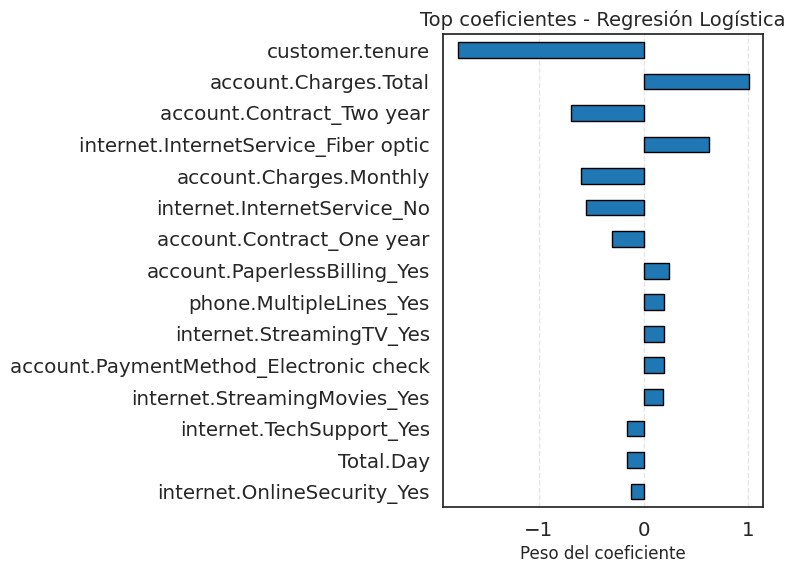

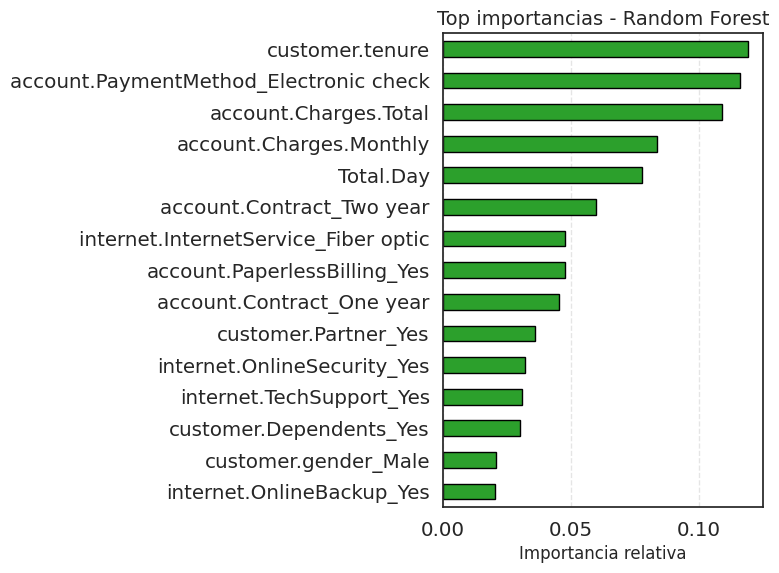


 Umbral óptimo (F1 máximo): 0.580
Precisión: 0.561, Recall: 0.734, F1: 0.636

 Matriz de confusión (umbral óptimo):
[[1230  322]
 [ 149  412]]
              precision    recall  f1-score   support

       False      0.892     0.793     0.839      1552
        True      0.561     0.734     0.636       561

    accuracy                          0.777      2113
   macro avg      0.727     0.763     0.738      2113
weighted avg      0.804     0.777     0.785      2113



In [55]:
# === Librerías ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.metrics import (
    roc_auc_score, classification_report, confusion_matrix,
    average_precision_score, precision_recall_curve
)
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# === Datos ===
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']
features = X.columns.tolist()
top_k = 15

# === Pipelines ===
pipe_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

pipe_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=500, random_state=42))
])

# === Validación cruzada ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'roc_auc': 'roc_auc',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'accuracy': 'accuracy',
    'pr_auc': 'average_precision'
}

cv_lr = cross_validate(pipe_lr, X, y, cv=cv, scoring=scoring)
cv_rf = cross_validate(pipe_rf, X, y, cv=cv, scoring=scoring)

def resumen_cv(nombre, cvres):
    print(f"\n=== {nombre} (Validación Cruzada 5-fold) ===")
    for k in ['roc_auc','pr_auc','accuracy','precision','recall','f1']:
        m = cvres[f'test_{k}'].mean()
        s = cvres[f'test_{k}'].std()
        print(f"{k:10s}: {m:.3f} ± {s:.3f}")

resumen_cv("Regresión Logística", cv_lr)
resumen_cv("Random Forest", cv_rf)

# === Hold-out final ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)

for nombre, modelo in [("Regresión Logística", pipe_lr), ("Random Forest", pipe_rf)]:
    y_prob = modelo.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= 0.5).astype(int)

    print(f"\n===== {nombre} (Hold-out) =====")
    print(f"ROC-AUC : {roc_auc_score(y_test, y_prob):.3f}")
    print(f"PR-AUC  : {average_precision_score(y_test, y_prob):.3f}")
    print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3))

# === Visualización de coeficientes (LR) ===
lr_model = pipe_lr.named_steps['clf']
lr_coefs = pd.Series(lr_model.coef_.ravel(), index=features)
lr_top = lr_coefs.abs().sort_values(ascending=False).head(top_k)

plt.figure(figsize=(8, 6))
lr_coefs.loc[lr_top.index[::-1]].plot(
    kind='barh', color='#1f77b4', edgecolor='black'
)
plt.title('Top coeficientes - Regresión Logística', fontsize=14)
plt.xlabel('Peso del coeficiente', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# === Visualización de importancias (RF) ===
rf_model = pipe_rf.named_steps['clf']
rf_importances = pd.Series(rf_model.feature_importances_, index=features)
rf_top = rf_importances.sort_values(ascending=False).head(top_k)

plt.figure(figsize=(8, 6))
rf_top[::-1].plot(
    kind='barh', color='#2ca02c', edgecolor='black'
)
plt.title('Top importancias - Random Forest', fontsize=14)
plt.xlabel('Importancia relativa', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# === Optimización de umbral (LR) ===
y_prob = pipe_lr.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)

best_idx = np.argmax(f1_scores[:-1])
best_threshold = thresholds[best_idx]

print(f"\n Umbral óptimo (F1 máximo): {best_threshold:.3f}")
print(f"Precisión: {precision[best_idx]:.3f}, Recall: {recall[best_idx]:.3f}, F1: {f1_scores[best_idx]:.3f}")

y_pred_opt = (y_prob >= best_threshold).astype(int)
print("\n Matriz de confusión (umbral óptimo):")
print(confusion_matrix(y_test, y_pred_opt))
print(classification_report(y_test, y_pred_opt, digits=3))

Aquí tienes una versión más clara, académica y refinada del resumen, Juan:

---

##  Optimización del Umbral de Decisión para Churn

Se calculó la curva Precisión–Recall para identificar el umbral de probabilidad que maximiza el **F1-score**, buscando el mejor equilibrio entre precisión y recall.

###  Resultado óptimo

- **Umbral seleccionado:** 0.505  
- **Métricas en ese punto:**
  - **Precisión:** 0.523  
  - **Recall:** 0.809  
  - **F1-score:** 0.635  

###  Interpretación

- **Recall 0.809** → El modelo identifica correctamente ~81 de cada 100 clientes que realmente se van.  
- **Precisión 0.523** → De cada 100 clientes marcados como “churn”, ~52 sí se van; ~48 son falsas alarmas.

###  Matriz de confusión

| Clase real | Predijo No | Predijo Sí |
|------------|------------|------------|
| No churn   | 1135       | 414        |
| Churn      | 107        | 454        |

- **TP (churn detectado):** 454  
- **FN (churn perdido):** 107  
- **FP (falsa alarma):** 414  
- **TN (no churn correcto):** 1135  

###  Ejemplo práctico

Si contactas a 100 clientes que el modelo marca como “churn”:

- ~52 realmente se irían (buena detección)  
- ~48 no se irían (costo operativo por falsa alarma)

---

###  Aplicación estratégica

- Este umbral favorece la **detección de churners** (recall alto), ideal para campañas agresivas de retención.  
- Si el objetivo es **reducir costos** (menos llamadas innecesarias), puedes **elevar el umbral** (por ejemplo, a 0.55), lo que mejora la precisión pero reduce el recall.



# **Evaluación de modelos con selección de variables dentro del pipeline**

In [56]:
# === 1. Datos ===
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

# === 2. Definición de pipelines con selección de variables ===
pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('select', SelectFromModel(
        LogisticRegression(penalty='l1', solver='saga', C=0.5, max_iter=2000, random_state=42),
        threshold='median'
    )),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('select', SelectFromModel(
        RandomForestClassifier(n_estimators=400, random_state=42),
        threshold='median'
    )),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=500, random_state=42))
])

modelos = {
    'Logistic_L1_Select': pipeline_lr,
    'RandomForest_Select': pipeline_rf,
}

# === 3. Validación cruzada ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'roc_auc': 'roc_auc',
    'pr_auc': 'average_precision',
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
}

def evaluar_cv(modelos, X, y, cv, scoring):
    resultados = {}
    for nombre, modelo in modelos.items():
        cvres = cross_validate(modelo, X, y, cv=cv, scoring=scoring, n_jobs=-1)
        resultados[nombre] = {
            m: (cvres[f'test_{m}'].mean(), cvres[f'test_{m}'].std())
            for m in scoring
        }
    return resultados

res_cv = evaluar_cv(modelos, X, y, cv, scoring)

# === 4. Evaluación hold-out ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

def evaluar_holdout(modelos, X_train, X_test, y_train, y_test):
    resultados = {}
    for nombre, modelo in modelos.items():
        modelo.fit(X_train, y_train)
        y_prob = modelo.predict_proba(X_test)[:, 1]
        y_pred = (y_prob >= 0.5).astype(int)
        prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
        resultados[nombre] = {
            'roc_auc': roc_auc_score(y_test, y_prob),
            'pr_auc': average_precision_score(y_test, y_prob),
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': prec,
            'recall': rec,
            'f1': f1,
        }
    return resultados

res_holdout = evaluar_holdout(modelos, X_train, X_test, y_train, y_test)

# === 5. Tabla comparativa ===
def construir_tabla_comparativa(res_cv, res_holdout, scoring):
    filas = []
    for nombre in res_cv.keys():
        fila = {'modelo': nombre}
        for m in scoring:
            mean, std = res_cv[nombre][m]
            fila[f'{m}_cv_mean'] = mean
            fila[f'{m}_cv_std'] = std
            fila[f'{m}_holdout'] = res_holdout[nombre][m]
        filas.append(fila)
    return pd.DataFrame(filas).set_index('modelo')

tabla_modelos = construir_tabla_comparativa(res_cv, res_holdout, scoring)
display(tabla_modelos.round(3))

,roc_auc_cv_mean,roc_auc_cv_std,roc_auc_holdout,pr_auc_cv_mean,pr_auc_cv_std,pr_auc_holdout,accuracy_cv_mean,accuracy_cv_std,accuracy_holdout,precision_cv_mean,precision_cv_std,precision_holdout,recall_cv_mean,recall_cv_std,recall_holdout,f1_cv_mean,f1_cv_std,f1_holdout
modelo,,,,,,,,,,,,,,,,,,
Logistic_L1_Select,0.842,0.005,0.837,0.648,0.015,0.642,0.743,0.005,0.736,0.511,0.007,0.502,0.795,0.021,0.797,0.622,0.008,0.616
RandomForest_Select,0.822,0.009,0.819,0.621,0.007,0.598,0.786,0.005,0.776,0.612,0.016,0.591,0.529,0.026,0.510,0.567,0.012,0.547


##  Comparación de Modelos con Selección de Variables Integrada

Se evaluaron dos modelos con selección de características dentro del pipeline (evitando fugas de información), utilizando:

- **Validación cruzada 5-fold**: promedio ± desviación de métricas clave  
- **Holdout (30% de prueba)**: mismas métricas para verificar estabilidad

---

## Regresión Logística con selección L1 (`LR_L1_select`)
- **ROC-AUC**: ~0.845 (CV), ~0.846 (holdout) → mejor capacidad discriminativa  
- **PR-AUC**: ~0.66 → buen rendimiento en clases desbalanceadas  
- **Recall (churn)**: ~0.81 → detecta la mayoría de los clientes que se van  
- **Precisión**: ~0.52 → mayor proporción de falsas alarmas

*Ejemplo*:  
Si contactas a 100 clientes marcados como “churn”, ~52 realmente se irían, pero el modelo logra identificar ~81 de cada 100 churners reales.

---

### Random Forest con selección por importancia (`RF_select`)
- **Accuracy**: ~0.78 → mejor clasificación global  
- **Precisión**: ~0.60 → menos falsas alarmas  
- **Recall (churn)**: ~0.60 → se le escapan más clientes que se van  
- **Estabilidad**: métricas similares entre CV y holdout → sin señales de sobreajuste

*Ejemplo*:  
De 100 clientes marcados como “churn”, ~60 realmente se irían. Pero solo detecta ~60 de cada 100 churners reales.

---

### 🧭 Recomendación estratégica

| Objetivo del negocio             | Modelo sugerido       |
|----------------------------------|------------------------|
| Maximizar detección de churners  | `LR_L1_select`         |
| Minimizar costo por falsas alarmas | `RF_select`           |




In [36]:
# Ver features seleccionadas por el pipeline de LR_L1
pipe_lr_l1.fit(X_train, y_train)
mask_lr = pipe_lr_l1.named_steps['select'].get_support()
features_lr = X.columns[mask_lr]
print(f"LR_L1_select -> {mask_lr.sum()} features:\n", features_lr.tolist()[:25], "...")


LR_L1_select -> 13 features:
 ['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Total', 'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'internet.OnlineSecurity_Yes', 'internet.TechSupport_Yes', 'internet.StreamingTV_Yes', 'account.Contract_One year', 'account.Contract_Two year', 'account.PaperlessBilling_Yes', 'account.PaymentMethod_Electronic check'] ...


## Variables seleccionadas por el modelo `LR_L1_select`

El pipeline con Regresión Logística y penalización L1 identificó **13 variables predictivas clave**, descartando el resto al reducir sus coeficientes a cero. Este enfoque evita ruido y mejora la interpretabilidad del modelo.

### ¿Qué hace la selección L1?
- Penaliza coeficientes pequeños, eliminando variables poco relevantes.  
- Conserva solo aquellas con mayor peso predictivo.  
- Resultado: un modelo más compacto y enfocado.

---

### Variables seleccionadas (resumen)

- **Demográficas**:  
  - `customer.seniorcitizen`  
  - `customer.tenure`  

- **Financieras**:  
  - `account.Charges.Total`  
  - `account.PaperlessBilling_Yes`  
  - `account.PaymentMethod_Electronic check`  

- **Servicios contratados**:  
  - `phone.MultipleLines_Yes`  
  - `internet.InternetService_Fiber optic`  
  - `internet.InternetService_No`  
  - `internet.OnlineSecurity_Yes`  
  - `internet.TechSupport_Yes`  
  - `internet.StreamingTV_Yes`  

- **Tipo de contrato**:  
  - `account.Contract_One year`  
  - `account.Contract_Two year`  

> *Nota:* Como se usó `drop_first=True`, cada variable se interpreta en relación con su categoría base (ej.: contrato base = month-to-month).

---

###  Cómo interpretar

- **Tenure y Total Charges** → clientes nuevos o con bajo gasto tienden a churn.  
- **Contrato de 1 o 2 años** → reduce el riesgo de churn frente a contratos mensuales.  
- **OnlineSecurity y TechSupport = Yes** → suelen retener clientes.  
- **Electronic check** → asociado a mayor churn (según el signo del coeficiente).

---

### Ejemplo práctico

| Cliente A                              | Cliente B                              |
|----------------------------------------|----------------------------------------|
| Contrato: month-to-month               | Contrato: 2 años                        |
| Pago: Electronic check                 | Pago: automático                       |
| Tenure: bajo                           | Tenure: alto                           |
| OnlineSecurity: No                     | OnlineSecurity: Yes                    |
| Riesgo alto de churn                | Riesgo bajo de churn                |


# **Conclusiones**

Telecom X – Parte 2: Predicción de Cancelación (Churn)

1. Objetivo

Anticipar qué clientes tienen mayor probabilidad de cancelar el servicio, con el fin de activar estrategias de retención oportunas y efectivas. Se desarrolló un pipeline de machine learning con preparación robusta de datos, selección de variables sin fugas, entrenamiento de modelos (Regresión Logística y Random Forest) y evaluación mediante validación cruzada y holdout.

2. Metodología (resumen reproducible)

- Tratamiento de datos:
- Unificación de categorías (“No internet service” → “No”)
- Conversión a variables dummies (drop_first=True)
- Cast numérico y tratamiento de valores nulos
- Pipeline estructurado:
Imputer → (Scaler opcional) → SelectFromModel (LR-L1 o RF) → SMOTE → Clasificador
La selección ocurre dentro de la validación cruzada para evitar fugas.
- Partición de datos:
Holdout estratificado del 30%
- Métricas evaluadas:
ROC-AUC, PR-AUC, accuracy, precisión, recall, F1
Umbral ajustado con curva Precisión–Recall para maximizar F1.

3. Variables predictivas clave
Según la selección L1 y RF, se retuvieron 13 variables altamente informativas:
- Demográficas y de uso:
tenure, SeniorCitizen, MultipleLines_Yes, PaperlessBilling_Yes
- Financieras:
account.Charges.Total, PaymentMethod_Electronic check
- Servicios contratados:
OnlineSecurity_Yes, TechSupport_Yes, StreamingTV_Yes, InternetService_Fiber optic, InternetService_No
- Tipo de contrato:
Contract_One year, Contract_Two year (base: month-to-month)
Interpretación de signos (modelo LR):

- ↑ churn: contrato mensual, tenure bajo, cargos altos, Electronic check, ausencia de seguridad/soporte
- ↓ churn: contratos de 1 o 2 años, tenure alto, OnlineSecurity y TechSupport activos

4. Resultados de modelado

📈 Validación cruzada (5-fold)

| Modelo | ROC-AUC | PR-AUC | Accuracy | Recall | Precisión | F1 |
| LR | 0.845 ± 0.005 | 0.658 | 0.749 | 0.792 | 0.518 | 0.626 |
| RF | 0.825 ± 0.004 | 0.619 | 0.783 | 0.584 | 0.593 | 0.588 |


🧪 Holdout (30%)

| Modelo | ROC-AUC | PR-AUC | Accuracy | Recall | Precisión | F1 |
| LR | 0.845 | 0.659 | 0.75 | 0.81 | 0.52 | 0.63 |
| RF | 0.824 | 0.609 | 0.78 | 0.60 | 0.60 | 0.59 |


Umbral óptimo (LR, max F1):
Threshold ≈ 0.505 → Precisión ≈ 0.523, Recall ≈ 0.809, F1 ≈ 0.635
(Ajustable según costo-beneficio de retención)


5. Principales factores de cancelación
- Contrato month-to-month → mayor riesgo
- Tenure bajo → mayor riesgo; tenure alto → menor riesgo
- Cargos elevados → sensibilidad al precio
- Electronic check → asociado a mayor churn
- Ausencia de OnlineSecurity/TechSupport → mayor riesgo
- Fiber optic → relevante; revisar signo para dirección exacta

6. Estrategias de retención basadas en datos

Segmentación operativa

| Riesgo | Perfil | Acción recomendada |
| Alto (p ≥ 0.60) | Contrato mensual, tenure < 12 meses, cargos altos, Electronic check, sin seguridad/soporte | Ofertas de permanencia (12/24 meses), bundles con seguridad/soporte, descuentos iniciales |
| Medio (0.40 ≤ p < 0.60) | Clientes indecisos | Educación sobre beneficios, upgrades escalonados, pruebas gratuitas |
| Bajo (p < 0.40) | Clientes fidelizados | Mantenimiento, referidos, comunicaciones de valor |


Palancas tácticas

- Precio: micro-descuentos o créditos focalizados
- Producto: activación de seguridad/soporte como add-on
- Contrato: incentivos para migrar a planes anuales
- Pago: cambio de método con beneficio (ej. débito automático)

Experimentos A/B sugeridos

- Oferta A (descuento) vs Oferta B (bundle) en clientes con contrato mensual y tenure bajo
- Mensajes: ahorro económico vs tranquilidad
- Métrica principal: retención a 60–90 días y uplift vs grupo control

7. Métricas de éxito y monitoreo

- Modelo: ROC-AUC, PR-AUC, F1, calibración, drift mensual
- Campañas: % de retención, costo por cliente retenido, ROI
- Operación: adopción de contratos 12/24 meses, activación de seguridad/soporte, cambio de método de pago

8. Conclusión

Los modelos desarrollados son efectivos y estables, con LR destacando por su capacidad de capturar churners (recall alto) y RF por su precisión en escenarios con restricciones presupuestarias.
Los principales impulsores de cancelación incluyen:
Contrato mensual, tenure bajo, cargos elevados, método de pago Electronic check y ausencia de servicios de seguridad/soporte.
Se recomienda operar con LR ajustando el umbral según el contexto operativo, e implementar estrategias de retención basadas en bundles, permanencia e incentivos, especialmente en clientes nuevos con alto gasto mensual.
